In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import csv

In [64]:
import tensorflow as tf
import numpy as np
from math import cos, sin, pi
import argparse
from tensorflow.python.framework import ops
import lme_custom_ops
import pyconrad as pyc
pyc.setup_pyconrad()
import os
import time
import sys

ImportError: No module named 'jpype.awt'

## Results - generated samples

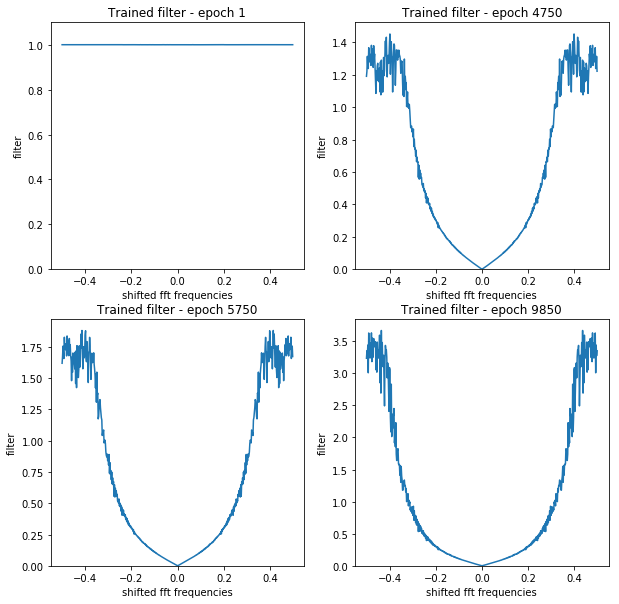

In [24]:
detector_width = 512
freq = np.fft.fftshift(np.fft.fftfreq(n=detector_width,d=1))

f, axarr = plt.subplots(2,2, figsize=(10,10))
ax = axarr[0,0]
ax.plot(freq, np.fft.fftshift(np.load("./filters_generated/f1.npy")))
ax.set_ylabel('filter')
ax.set_xlabel('shifted fft frequencies')
ax.set_ylim(bottom=0, top = 1.1)
ax.set_title("Trained filter - epoch 1")
ax = axarr[0,1]
ax.plot(freq, np.fft.fftshift(np.load("./filters_generated/f4751.npy")))
ax.set_ylabel('filter')
ax.set_xlabel('shifted fft frequencies')
ax.set_ylim(bottom=0)
ax.set_title("Trained filter - epoch 4750")
ax = axarr[1,0]
ax.plot(freq, np.fft.fftshift(np.load("./filters_generated/f5751.npy")))
ax.set_ylabel('filter')
ax.set_xlabel('shifted fft frequencies')
ax.set_ylim(bottom=0)
ax.set_title("Trained filter - epoch 5750")
ax = axarr[1,1]
ax.plot(freq, np.fft.fftshift(np.load("./filters_generated/f9851.npy")))
ax.set_ylabel('filter')
ax.set_xlabel('shifted fft frequencies')
ax.set_ylim(bottom=0)
ax.set_title("Trained filter - epoch 9850")

plt.show()

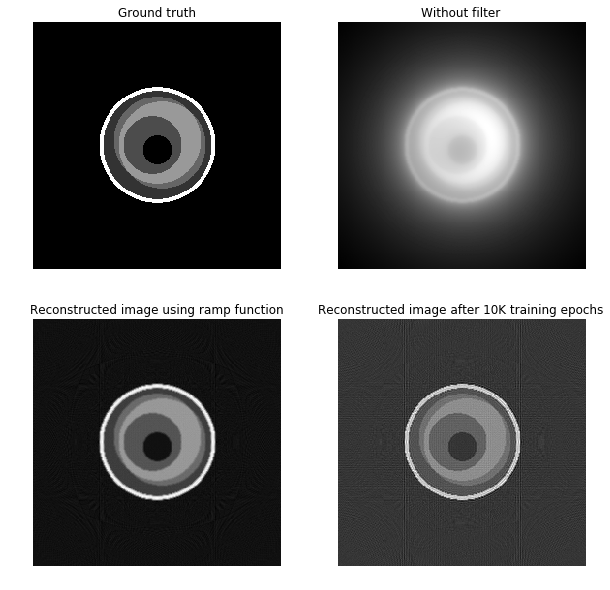

In [22]:
f, axarr = plt.subplots(2,2, figsize=(10,10))
ax = axarr[0,0]
img = np.load("./imgs_generated/ground_truth.npy")
ax.imshow(img,cmap="gray")
ax.grid(False)
ax.set_title("Ground truth")
ax.axis('off')

ax = axarr[0,1]
img = np.load("./imgs_generated/imgbegin.npy")
ax.imshow(img,cmap="gray")
ax.grid(False)
ax.set_title("Without filter")
ax.axis('off')

ax = axarr[1,0]
img = np.load("./imgs_generated/imgramp.npy")/np.max(img)
ax.imshow(img,cmap="gray")
ax.grid(False)
ax.set_title("Reconstructed image using ramp function")
ax.axis('off')

ax = axarr[1,1]
img = np.load("./imgs_generated/imgfinal.npy")/np.max(img)
ax.imshow(img,cmap="gray")
ax.grid(False)
ax.set_title("Reconstructed image after 10K training epochs")
ax.axis('off')
plt.show()

In [23]:
train_loss = []
epoch = np.arange(1, 10000, 50)
with open('./losses_generated/train_losses.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for rows in plots:
        train_loss.append(float(rows[0]))
train_loss = np.array(train_loss)

test_loss = []
with open('./losses_generated/test_losses.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for rows in plots:
        test_loss.append(float(rows[0]))
test_loss = np.array(test_loss)

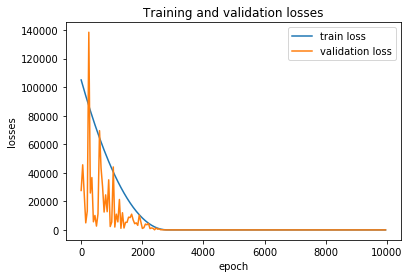

In [24]:
plt.plot(epoch, train_loss, label='train loss')
plt.plot(epoch, test_loss, label='validation loss')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.title('Training and validation losses')
plt.legend()
plt.show()

## Results - real samples

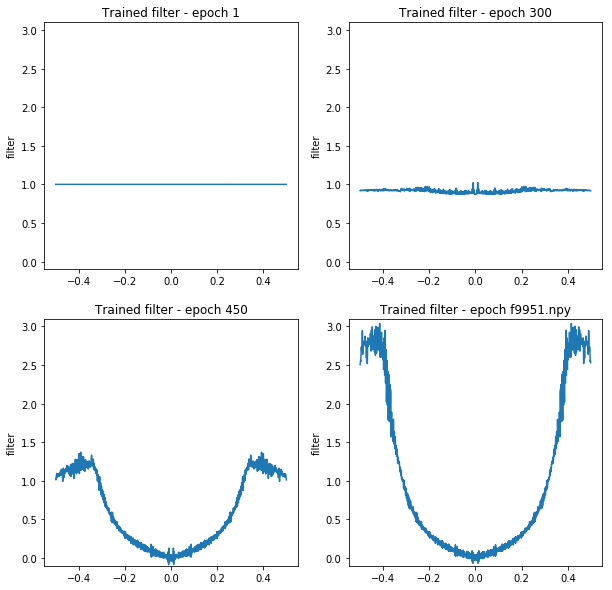

In [33]:
detector_width = 1024
freq = np.fft.fftshift(np.fft.fftfreq(n=detector_width,d=1))
f, axarr = plt.subplots(2,2, figsize=(10,10))
ax = axarr[0,0]
ax.plot(freq, np.fft.fftshift(np.load("./filters_real/f1.npy")))
ax.set_ylabel('filter')
ax.set_xlabel('shifted fft frequencies')
ax.set_ylim(bottom=-0.1, top = 3.1)
ax.set_title("Trained filter - epoch 1")
ax = axarr[0,1]
ax.plot(freq, np.fft.fftshift(np.load("./filters_real/f301.npy")))
ax.set_ylabel('filter')
ax.set_xlabel('shifted fft frequencies')
ax.set_ylim(bottom=-0.1, top = 3.1)
ax.set_title("Trained filter - epoch 300")
ax = axarr[1,0]
ax.plot(freq, np.fft.fftshift(np.load("./filters_real/f4501.npy")))
ax.set_ylabel('filter')
ax.set_xlabel('shifted fft frequencies')
ax.set_ylim(bottom=-0.1, top = 3.1)
ax.set_title("Trained filter - epoch 450")
ax = axarr[1,1]
ax.plot(freq, np.fft.fftshift(np.load("./filters_real/f9951.npy")))
ax.set_ylabel('filter')
ax.set_xlabel('shifted fft frequencies')
ax.set_ylim(bottom=-0.1, top = 3.1)
ax.set_title("Trained filter - epoch f9951.npy")

plt.show()

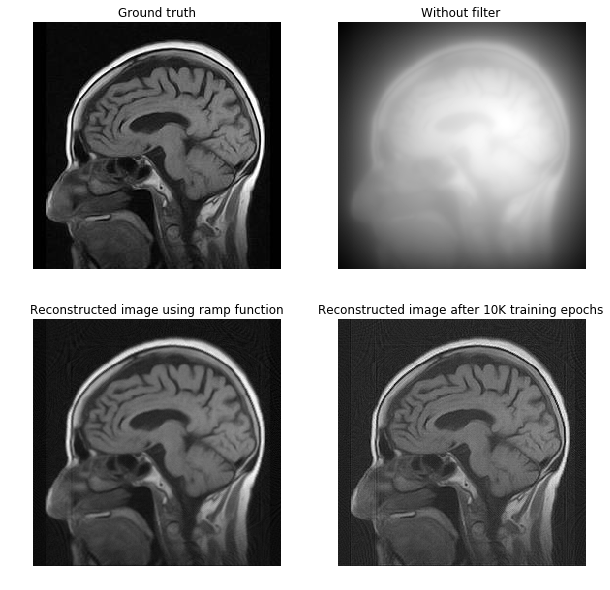

In [26]:
f, axarr = plt.subplots(2,2, figsize=(10,10))
ax = axarr[0,0]
img = np.load("./imgs_real/ground_truth.npy")
ax.imshow(img,cmap="gray")
ax.grid(False)
ax.set_title("Ground truth")
ax.axis('off')

ax = axarr[0,1]
img = np.load("./imgs_real/imgbegin.npy")
ax.imshow(img,cmap="gray")
ax.grid(False)
ax.set_title("Without filter")
ax.axis('off')

ax = axarr[1,0]
img = np.load("./imgs_real/imgramp.npy")/np.max(img)
ax.imshow(img,cmap="gray")
ax.grid(False)
ax.set_title("Reconstructed image using ramp function")
ax.axis('off')

ax = axarr[1,1]
img = np.load("./imgs_real/imgfinal.npy")/np.max(img)
ax.imshow(img,cmap="gray")
ax.grid(False)
ax.set_title("Reconstructed image after 10K training epochs")
ax.axis('off')
plt.show()

In [3]:
train_loss = []
epoch = np.arange(1, 10000, 50)
with open('./losses_real/train_losses.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for rows in plots:
        train_loss.append(float(rows[0]))
train_loss = np.array(train_loss)

test_loss = []
with open('./losses_real/test_losses.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for rows in plots:
        test_loss.append(float(rows[0]))
test_loss = np.array(test_loss)

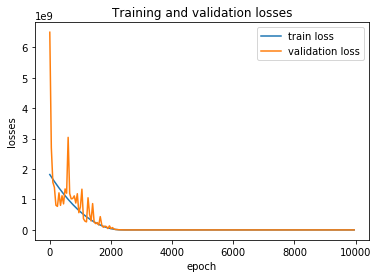

In [4]:
plt.plot(epoch, train_loss, label='train loss')
plt.plot(epoch, test_loss, label='validation loss')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.title('Training and validation losses')
plt.legend()
plt.show()

## create videos

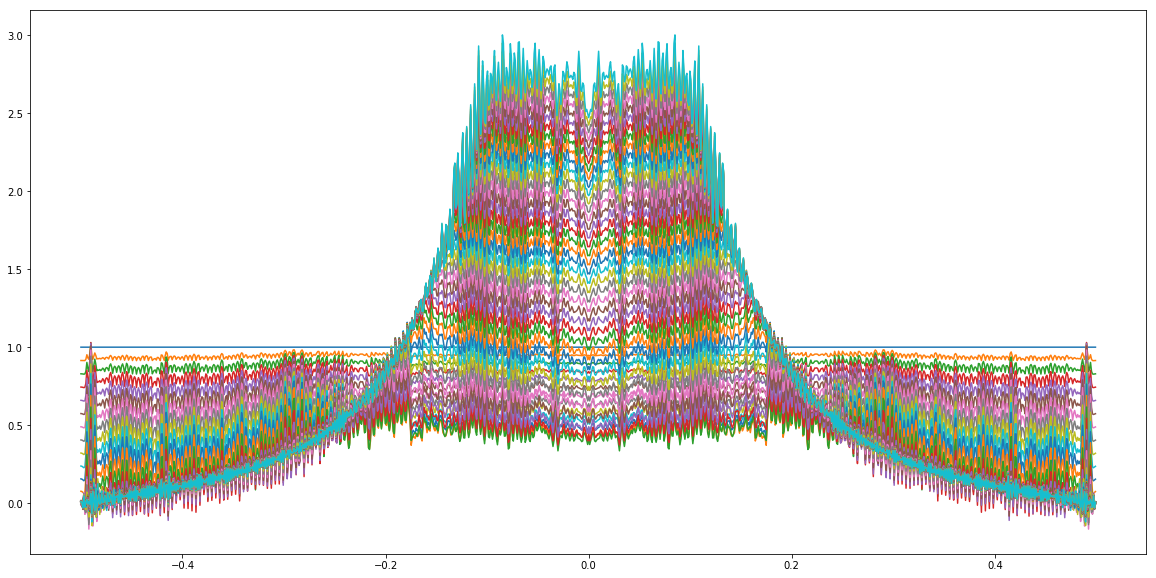

In [72]:
import imageio
import os
import cv2
import numpy as np
detector_width = 1024
freq = np.fft.fftshift(np.fft.fftfreq(n=detector_width,d=1))
imgs = []
plt.figure(figsize=(20,10))
for i in np.linspace(1, 9801, 50):
    im = np.load("filters_real/f"+str(int(i))+".npy")
    
    plt.plot(freq, im)
    
    #imgs.append()
    

In [51]:
import cv2
imgs = []

for i in np.linspace(1, 9801, 50):
    imgs.append(cv2.imread('./filters_imgs_real/'+str(int(i))+'.png'))

imgs = np.array(imgs)

In [54]:
def frames2video(images):
    """
    Merges images in path into a video

    :param path: path with prediction images
    :return: nothing
    """

    # h, w, c = images[0].shape
    videowriter = imageio.get_writer('filters_real.mp4', fps=10)
    for im in images:
        videowriter.append_data(im)
    videowriter.close() 
    
frames2video(imgs)

In [ ]:
# Save them as frames into a gif 
exportname = "output.gif"
kargs = { 'duration':0.5}
imageio.mimsave(exportname, imgs, 'GIF', **kargs)